In [1]:
import os
notebook_path = os.getcwd()
import numpy as np
import sys
sys.path.append('../')
from WATRES import *
import pandas as pd
import itertools

root_path = '/home/duchemin/Documents/githubWATRES/zenodo_package/'

# Predicting TTDs

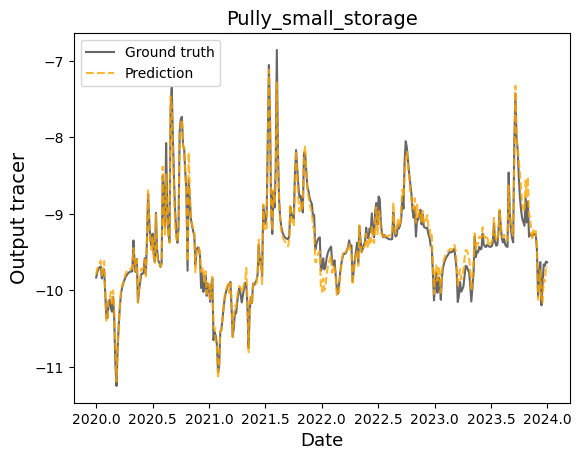

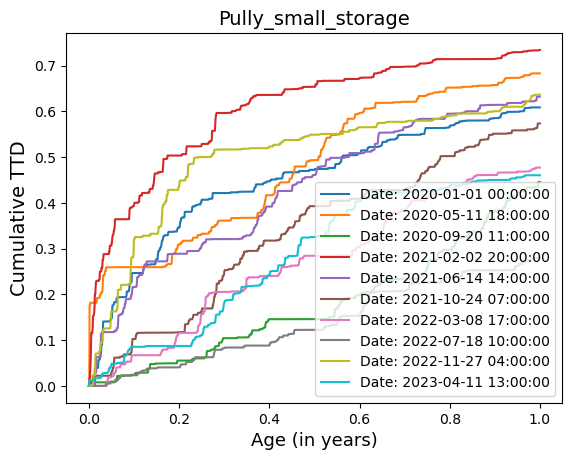

In [2]:
locations = ['Pully', 'Lugano', 'Basel']
sizes_storage = ['small_storage', 'large_storage']
sites = list(map(lambda x: '{0}_{1}'.format(x[0],x[1]), list(itertools.product(locations, sizes_storage))))
algo = 'WATRES'


def filter_dates(dates):
    return np.where(dates>=2020)[0]


for site in sites[:1]:
    x = {
        'pathsite': os.path.join(root_path, f"data/{site}/"),
        'path_model': os.path.join(root_path, f"data/{site}/save/save_input_std_0.1-output_std_0.1_{algo}.pth.tar"),
        'site': site,
        'algo': algo
    }

    # Loading the pretrained model
    model = WATRES(pathsite=x['pathsite'], site=x['site'], algo=x['algo'], path_model=x['path_model'])
    
    # Getting the results for the dates defined by the filter
    results = model.model_estimate(filter_dates, BATCH_SIZE=400)
    
    # Showing prediction on output tracer data
    dates = results['timeyear']
    
    # Observed output tracer
    Cout = results['Cout']
    
    # Predicted output tracer
    Chat = results['Chat']
    
    # Showing predicted and ground truth output concentration
    plt.plot(dates, Cout,  c='black', linestyle='-', alpha=0.6, label='Ground truth')
    plt.plot(dates, Chat,  c='orange', linestyle='--',  alpha=0.8, label='Prediction')
    plt.xlabel('Date', fontsize=13)
    plt.ylabel('Output tracer', fontsize=14)
    plt.legend()
    plt.title(site, fontsize=14)
    plt.show()
    
    # Showing predicted cumulative TTDs
    dates = results['timeyear']
    # Predicted cumulative TTDs
    PQhat = results['PQhat']
    maxT = 24*365
    xticks = np.arange(0, maxT, 1)/(24*365) 
    nTTD = 10
    for i in range(nTTD):
        t = int(i * PQhat.shape[1] / (nTTD+1))
        datetime = utils.fractional_year_to_datetime(float(dates[t]))
        plt.plot(xticks, PQhat[:maxT,t],  label='Date: {0}'.format(datetime))
    plt.xlabel('Age (in years)', fontsize=13)
    plt.ylabel('Cumulative TTD', fontsize=14)
    plt.legend()
    plt.title(site, fontsize=14)
    plt.show()